In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr as pearson
from scipy.stats import spearmanr as spearman
from math import isnan
from collections import Counter

In [8]:
data_file = "results_train_aug09.csv"
raw_data_file = pd.read_csv(data_file)
raw_data_file.columns = [c.replace('.', '_') for c in raw_data_file.columns]

data_file = "results_devte_aug09.csv"
raw_data_file_d = pd.read_csv(data_file)
raw_data_file_d.columns = [c.replace('.', '_') for c in raw_data_file_d.columns]

raw_data_file = raw_data_file.append(raw_data_file_d, ignore_index=True)

In [9]:
def extract_dataframe(data):
    '''
    Input: Pandas csv dataframe obtained from MTurk
    
    Output: Pandas dataframe levelled by (User x Sentenced_ID)
    '''
    data["dicts"] = data["Input_var_arrays"].map(lambda x: json.loads(x))
    global_list = []
    
    for row in data.itertuples():
        for idx, local_dict in enumerate(row.dicts):
            temp_dict = local_dict.copy()
            var_part = "Answer_noun_part" + str(idx + 1)
            var_part_c = "Answer_noun_part_certainty" + str(idx + 1)
            var_kind = "Answer_noun_class" + str(idx + 1)
            var_kind_c = "Answer_noun_class_certainty" + str(idx + 1)
            var_abs = "Answer_noun_abs" + str(idx + 1)
            var_abs_c = "Answer_noun_abs_certainty" + str(idx + 1)
            temp_dict['part'] = getattr(row, var_part)
            temp_dict['part_conf'] = getattr(row, var_part_c)
            temp_dict['kind'] = getattr(row, var_kind)
            temp_dict['kind_conf'] = getattr(row, var_kind_c)
            temp_dict['abs'] = getattr(row, var_abs)
            temp_dict['abs_conf'] = getattr(row, var_abs_c)
            temp_dict['worker_id'] = row.WorkerId
            temp_dict['hit_id'] = row.HITId
            temp_dict['status'] = row.AssignmentStatus
            global_list.append(temp_dict)
    
    return pd.DataFrame(global_list)

In [10]:
raw_data = extract_dataframe(raw_data_file)
raw_data = raw_data[raw_data['status']!='Rejected']
raw_data = raw_data.reset_index(drop=True)
raw_data['sent_noun'] = raw_data['sent_id'].map(lambda x : x) + "_" +\
                           raw_data['noun_token'].map(lambda x: str(x))

# # Rearrange the columns
cols = ['hit_id', 'worker_id', 'sent_noun', 'noun', 'raw_sentence',
        'part', 'part_conf', 'kind', 'kind_conf', 'abs', 'abs_conf']


data = raw_data[cols]


# Here you can check each individual annotator and see if they are following the norm
x=Counter(list(data['worker_id'].values))
print(x.most_common()[:15])
print(data.shape)
ann_data = data[data['worker_id']=='A36XEP5H6KBQIB']
x_data = data[data['worker_id'] != 'A3CJWEYFZ8W42Y']
print(ann_data.shape)
print(x_data.shape)

[('A36XEP5H6KBQIB', 110), ('A27NSDUQTZSFQC', 70), ('AOBTFLJU2BEPR', 50), ('A1LG19R2RA89OZ', 30), ('ANYB94DHDJKNO', 20), ('AP4903X7HCNBA', 10), ('A1N1EF0MIRSEZZ', 10), ('AAASQIW3J32OL', 10), ('A3P57IUDHUKNCE', 10), ('A2AWKG4UBG794B', 10), ('A30AGR5KF8IEL', 10), ('A13UY6H25XM3UW', 10), ('A1RI7PPP9JE3SL', 10), ('A1AVKKVWWFUGLT', 10), ('A3C7S8JD5KCHQM', 10)]
(440, 11)
(110, 11)
(440, 11)


# Compare one annotator to rest

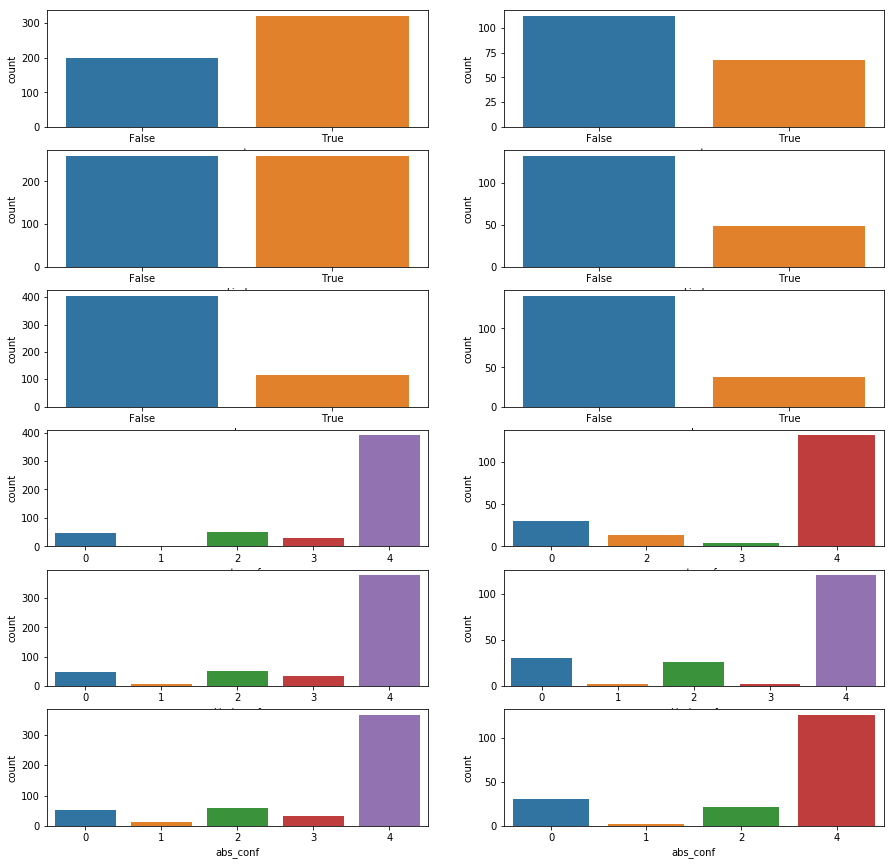

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15))
sns.countplot(x='part', data=x_data, ax=axs[0][0])
sns.countplot(x='part', data=ann_data, ax=axs[0][1])
sns.countplot(x='kind', data=x_data, ax=axs[1][0])
sns.countplot(x='kind', data=ann_data, ax=axs[1][1])
sns.countplot(x='abs', data=x_data, ax=axs[2][0])
sns.countplot(x='abs', data=ann_data, ax=axs[2][1])

sns.countplot(x='part_conf', data=x_data, ax=axs[3][0])
sns.countplot(x='part_conf', data=ann_data, ax=axs[3][1])
sns.countplot(x='kind_conf', data=x_data, ax=axs[4][0])
sns.countplot(x='kind_conf', data=ann_data, ax=axs[4][1])
sns.countplot(x='abs_conf', data=x_data, ax=axs[5][0])
sns.countplot(x='abs_conf', data=ann_data, ax=axs[5][1])

plt.show()